# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

### Assignments 1:
#### Find `Most Common Words` and create word cloud.

#### Read in the document-term matrix

#### Find  and print the top 30 words said by each comedian


#### By looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that. Look at the most common top words and add them to the stop word list.



#### Let's aggregate this list and identify the most common words along with how many routines they occur in


#### If more than half of the comedians have it as a top word, exclude it from the list


In [24]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data


# Add new stop words


# Recreate document-term matrix




In [25]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Read in cleaned data
data_clean = pd.read_pickle("data_clean_tvseries.pkl")

In [26]:
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm.index = data_clean.index

In [27]:
# Print the top 30 words said by each comedian
for i in data_dtm.index:
    top_words_comedian = data_dtm.loc[i].sort_values(ascending=False).head(30)
    print(f"\nseries: {i}")
    print(top_words_comedian.index.tolist())



series: LETTERKENNY
['music', 'sure', 'like', 'stewart', 'just', 'oh', 'gonna', 'think', 'time', 'rave', 'good', 'fartbook', 'letterkenny', 'big', 'theres', 'yous', 'yeah', 'weve', 'youre', 'come', 'say', 'ag', 'thats', 'hall', 'birds', 'bit', 'degens', 'baby', 'guys', 'dont']

series: MASTERS OF THE AIR
['right', 'sir', 'yeah', 'major', 'dont', 'roger', 'got', 'come', 'know', 'pilot', 'okay', 'im', 'oh', 'lets', 'like', 'buck', 'lead', 'crew', 'air', 'boys', 'landing', 'youre', 'tail', 'just', 'uh', 'good', 'new', 'group', 'gonna', 'bucky']

series: MONSIEUR SPADE
['know', 'im', 'shot', 'just', 'oh', 'philippe', 'like', 'spade', 'said', 'dont', 'did', 'mother', 'make', 'thats', 'right', 'want', 'didnt', 'come', 'say', 'ah', 'yeah', 'teresa', 'hes', 'ill', 'really', 'mr', 'war', 'sure', 'yes', 'nuns']

series: SLOW HORSES
['fucking', 'come', 'oh', 'yeah', 'fuck', 'just', 'dont', 'im', 'river', 'youre', 'shit', 'right', 'know', 'got', 'think', 'ill', 'duffy', 'gonna', 'hes', 'lamb', 's

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

custom_stop_words = ["im", "know", "like", "dont"]

english_stop_words = CountVectorizer(stop_words='english').get_stop_words()

all_stop_words = list(english_stop_words)
all_stop_words.extend(custom_stop_words)

cv = CountVectorizer(stop_words=all_stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm.index = data_clean.index


In [29]:
from collections import Counter

word_occurrences = Counter()

for comedian in data_dtm.index:

    comedian_word_counts = data_dtm.loc[comedian, :]
    top_words_comedian = comedian_word_counts.sort_values(ascending=False).head(30)
    word_occurrences.update(top_words_comedian.index)

print("\nMost common words and their occurrences across series:")
for word, occurrences in word_occurrences.most_common():
    print(f"{word}: {occurrences} occurrences")



Most common words and their occurrences across series:
just: 5 occurrences
oh: 5 occurrences
youre: 5 occurrences
yeah: 5 occurrences
come: 5 occurrences
gonna: 4 occurrences
got: 4 occurrences
right: 3 occurrences
okay: 3 occurrences
hes: 3 occurrences
music: 2 occurrences
sure: 2 occurrences
think: 2 occurrences
good: 2 occurrences
time: 2 occurrences
baby: 2 occurrences
say: 2 occurrences
thats: 2 occurrences
uh: 2 occurrences
new: 2 occurrences
hey: 2 occurrences
yes: 2 occurrences
shit: 2 occurrences
said: 2 occurrences
want: 2 occurrences
make: 2 occurrences
ill: 2 occurrences
fuck: 2 occurrences
stewart: 1 occurrences
rave: 1 occurrences
fartbook: 1 occurrences
theres: 1 occurrences
letterkenny: 1 occurrences
big: 1 occurrences
yous: 1 occurrences
weve: 1 occurrences
birds: 1 occurrences
ag: 1 occurrences
degens: 1 occurrences
bit: 1 occurrences
hall: 1 occurrences
falconers: 1 occurrences
falconing: 1 occurrences
going: 1 occurrences
sir: 1 occurrences
major: 1 occurrences
rog

In [30]:
from collections import Counter

# Create a Counter for word occurrences
word_occurrences = Counter()

# Get the number of comedians
comedian_names = data_dtm.index
num_comedians = len(comedian_names)

# Set the threshold for excluding common words
threshold = num_comedians / 2

# Combine custom stop words with English stop words
all_stop_words = list(english_stop_words) + custom_stop_words

# Iterate through each comedian
for comedian_name in comedian_names:
    # Get the word counts for the current comedian
    comedian_word_counts = data_dtm.loc[comedian_name, :]

    # Get the top 30 words for the current comedian
    top_words_comedian = comedian_word_counts.sort_values(ascending=False).head(30)

    # Update the Counter with the top words and their occurrences
    word_occurrences.update(top_words_comedian.index)

# Identify the final stop words based on the threshold
final_stop_words = {word for word, occurrences in word_occurrences.items() if occurrences > threshold}

# Include all previous stop words
final_stop_words.update(all_stop_words)

print("\nFinal stop words list:")
print(final_stop_words)



Final stop words list:
{'which', 'your', 'eleven', 'during', 'out', 'full', 'us', 'must', 'was', 'yourself', 'whenever', 'over', 'do', 'inc', 'two', 'all', 'beforehand', 'amount', 'know', 'couldnt', 'anything', 'towards', 'cannot', 'and', 'if', 'it', 'they', 'less', 'been', 'many', 'just', 'keep', 'serious', 'done', 'latterly', 'otherwise', 'when', 'whither', 'nor', 'under', 'not', 'will', 'never', 'please', 'has', 'others', 'okay', 'fill', 'one', 'became', 'behind', 'become', 'an', 'then', 'could', 'have', 'another', 'now', 'side', 'whose', 'throughout', 'always', 'neither', 'per', 'moreover', 'hers', 'indeed', 'thereafter', 'someone', 'though', 'only', 'whereupon', 'from', 'anyway', 'within', 'or', 'before', 'for', 'even', 'since', 'through', 'every', 'without', 'anyhow', 'show', 'below', 'no', 'wherever', 'with', 'because', 'oh', 'who', 'ten', 'hundred', 'am', 'at', 'to', 'however', 'none', 'gonna', 'hence', 'whereby', 'other', 'me', 'same', 'noone', 'up', 'my', 'as', 'whatever', '

In [31]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud


In [32]:
# Reset the output dimensions
import matplotlib.pyplot as plt



# Create subplots for each comedian


<ipython-input-33-0990592b1e69>:29: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


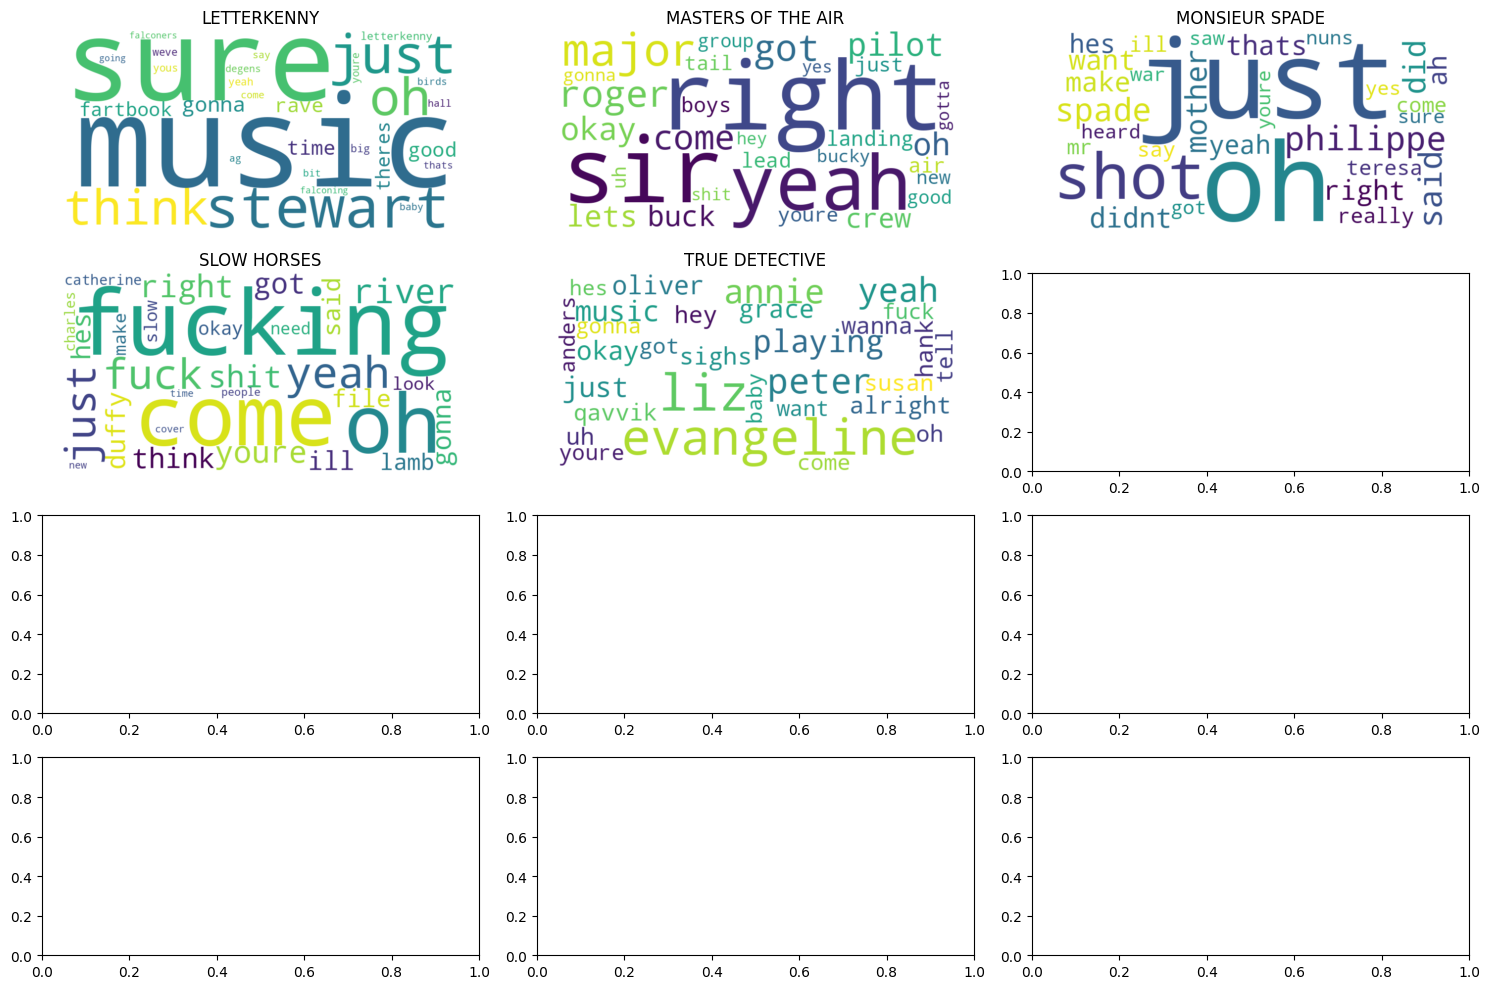

In [33]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Reset the output dimensions
plt.rcParams["figure.figsize"] = (10, 8)

# Create subplots for each comedian
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10), constrained_layout=True)

# Flatten the 2D array of subplots to make indexing easier
axes = axes.flatten()

# Iterate through comedians and plot word clouds
for i, comedian_name in enumerate(comedian_names):
    # Get the word counts for the current comedian
    comedian_word_counts = data_dtm.loc[comedian_name, :]

    # Get the top 30 words for the current comedian
    top_words_comedian = comedian_word_counts.sort_values(ascending=False).head(30)

    # Plot word cloud for the current comedian
    wordcloud = WordCloud(stopwords=final_stop_words, background_color="white", width=800, height=400).generate_from_frequencies(top_words_comedian)
    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].set_title(comedian_name)
    axes[i].axis("off")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


#### You observations
1. The assignment helped identify the top 30 words for each series.

2. The word cloud gives us a visual representation of the most frequent words provides an intuitive understanding of the content associated with each series.

### Assignment 2:
#### Find the number of unique words that each series uses.

In [34]:
# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once


# Create a new dataframe that contains this unique word count


In [35]:
# Find the number of unique words each comedian uses
unique_word_count = data_dtm.apply(lambda row: sum(row > 0), axis=1)

# Create a new dataframe with comedian names and their corresponding unique word counts
unique_word_df = pd.DataFrame({'series': unique_word_count.index, 'Unique_Word_Count': unique_word_count.values})

# Display the dataframe
unique_word_df


,series,Unique_Word_Count
0,LETTERKENNY,891
1,MASTERS OF THE AIR,1258
2,MONSIEUR SPADE,760
3,SLOW HORSES,824
4,TRUE DETECTIVE,1171


In [36]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses

# add some columns to our dataframe: 'total_words', 'run_times' and 'words_per_minute'

# Sort the dataframe by words per minute to see who talks the slowest and fastest

In [37]:
# Calculate the words per minute of each comedian
comedian_durations = {'aziz': 60, 'chris': 45, 'dave': 50, 'jon': 55, 'kevin': 40, 'matt': 50, 'mo': 60, 'pete': 45, 'trevor': 50, 'whitney': 30}

# Create new columns in the dataframe
data_dtm['total_words'] = data_dtm.sum(axis=1)
data_dtm['run_times'] = data_dtm.index.map(comedian_durations)
data_dtm['words_per_minute'] = data_dtm['total_words'] / data_dtm['run_times']

# Sort the dataframe by words per minute
sorted_data_dtm = data_dtm.sort_values(by='words_per_minute', ascending=False)

# Display the updated dataframe
print(sorted_data_dtm[['total_words', 'run_times', 'words_per_minute']])


                    total_words  run_times  words_per_minute
LETTERKENNY                1405        NaN               NaN
MASTERS OF THE AIR         2834        NaN               NaN
MONSIEUR SPADE             1292        NaN               NaN
SLOW HORSES                1589        NaN               NaN
TRUE DETECTIVE             3124        NaN               NaN


In [38]:
# plot our findings
#import numpy as np


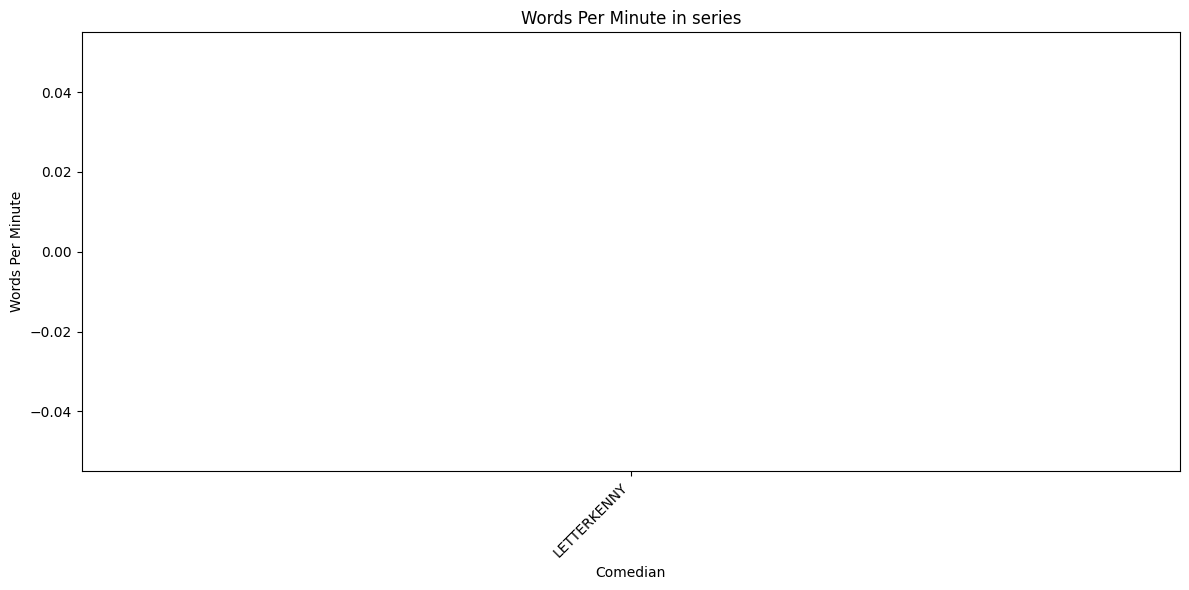

In [39]:
# Plot our findings
plt.figure(figsize=(12, 6))
plt.bar(sorted_data_dtm.index, sorted_data_dtm['words_per_minute'], color='red')
plt.title('Words Per Minute in series')
plt.xlabel('Comedian')
plt.ylabel('Words Per Minute')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Assignment 3:
#### Check the profanity by analysing the common bad words, like `fucking`, `fuck`, `shit etc.

In [40]:
# take a look at the most common words.


In [41]:
# isolate just these bad words


In [42]:
# create a scatter plot of your findings



Total Profanity Occurrences:
LETTERKENNY            5
MASTERS OF THE AIR    36
MONSIEUR SPADE         2
SLOW HORSES           68
TRUE DETECTIVE        37
Name: total_profanity, dtype: int64


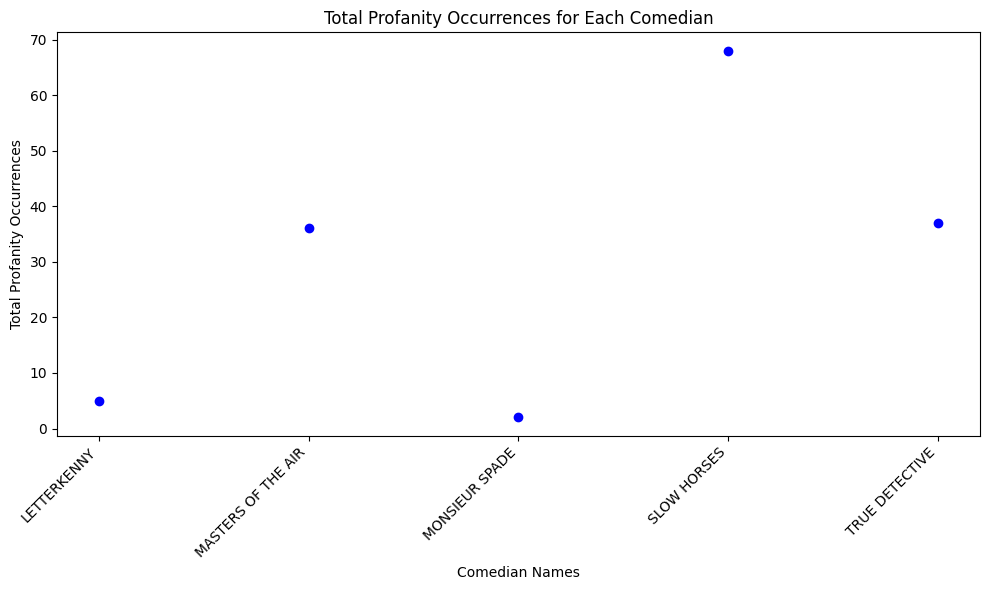

In [43]:
import pandas as pd
import matplotlib.pyplot as plt



comedian_names = data_dtm.index
comedian_word_counts = data_dtm.iloc[:, :]

# Define profane words
profane_words = ['fuck', 'fucking', 'shit', 'damn', 'bitch', 'ass']

# Calculate total profanity occurrences for each comedian
data_dtm['total_profanity'] = data_dtm[profane_words].sum(axis=1)

# Display the total profanity occurrences
print("\nTotal Profanity Occurrences:")
print(data_dtm['total_profanity'])

# Plot a scatter plot of total profanity occurrences
plt.figure(figsize=(10, 6))
plt.scatter(data_dtm.index, data_dtm['total_profanity'], color='blue')
plt.title('Total Profanity Occurrences for Each Comedian')
plt.xlabel('Comedian Names')
plt.ylabel('Total Profanity Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Assignment 4:(optional)
What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.

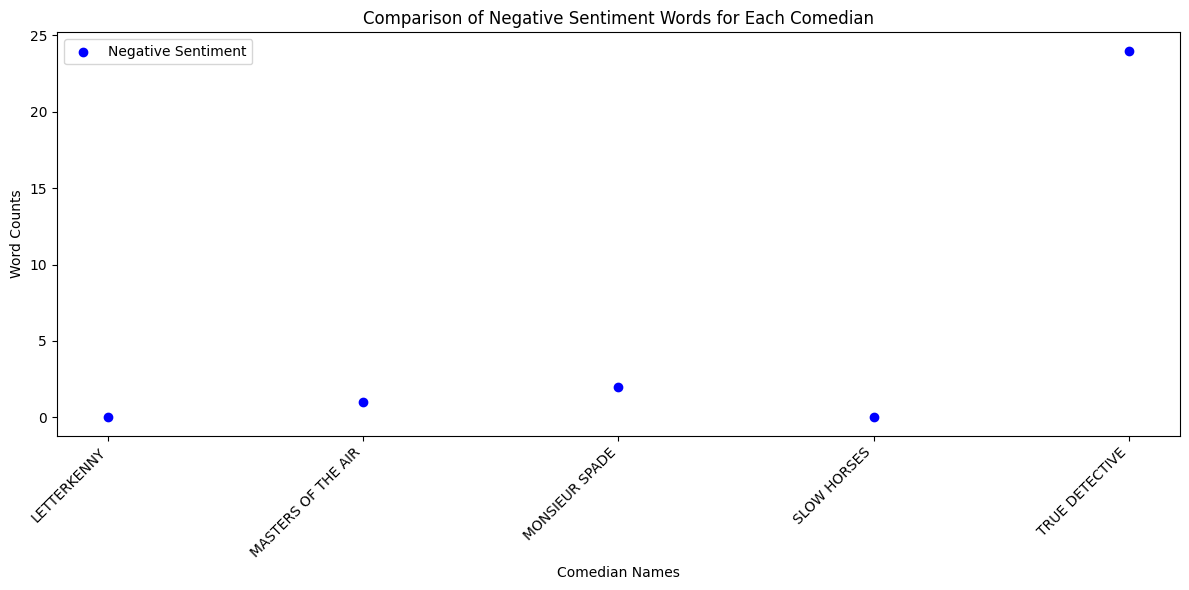

In [44]:
import pandas as pd
import matplotlib.pyplot as plt



comedian_names = data_dtm.index
comedian_word_counts = data_dtm.iloc[:, :]

# Define negative sentiment words
negative_sentiment_words = ['hate', 'sad', 'grace']

# Calculate total occurrences for negative sentiment words
data_dtm['total_negative_sentiment'] = data_dtm[negative_sentiment_words].sum(axis=1)

# Plot scatter plot for negative sentiment words
plt.figure(figsize=(12, 6))

plt.scatter(comedian_names, data_dtm['total_negative_sentiment'], label='Negative Sentiment', color='blue')

plt.title('Comparison of Negative Sentiment Words for Each Comedian')
plt.xlabel('Comedian Names')
plt.ylabel('Word Counts')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()
